In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report,accuracy_score

## Import Dataset

In [4]:
bank_data = pd.read_csv('Churn_Modelling.csv')

In [5]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
bank_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
bank_data.shape

(10000, 14)

## Check Missing Data

In [9]:
bank_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Encoding Categorial Data

In [10]:
bank_data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
bank_data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
label = LabelEncoder()
bank_data['Geography'] = label.fit_transform(bank_data['Geography'])
bank_data['Gender'] = label.fit_transform(bank_data['Gender'])

In [13]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:

# apply normalization techniques
column1 = 'Balance'
bank_data[column1] = MinMaxScaler().fit_transform(np.array(bank_data[column1]).reshape(-1,1))
  

In [16]:
column2 = 'EstimatedSalary'
bank_data[column2] = MinMaxScaler().fit_transform(np.array(bank_data[column2]).reshape(-1,1))

In [17]:
bank_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.000000,1,1,1,0.506735,1
1,2,15647311,Hill,608,2,0,41,1,0.334031,1,0,1,0.562709,0
2,3,15619304,Onio,502,0,0,42,8,0.636357,3,1,0,0.569654,1
3,4,15701354,Boni,699,0,0,39,1,0.000000,2,0,0,0.469120,0
4,5,15737888,Mitchell,850,2,0,43,2,0.500246,1,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,1,39,5,0.000000,2,1,0,0.481341,0
9996,9997,15569892,Johnstone,516,0,1,35,10,0.228657,1,1,1,0.508490,0
9997,9998,15584532,Liu,709,0,0,36,7,0.000000,1,0,1,0.210390,1
9998,9999,15682355,Sabbatini,772,1,1,42,3,0.299226,2,1,0,0.464429,1


## Data Visualisation

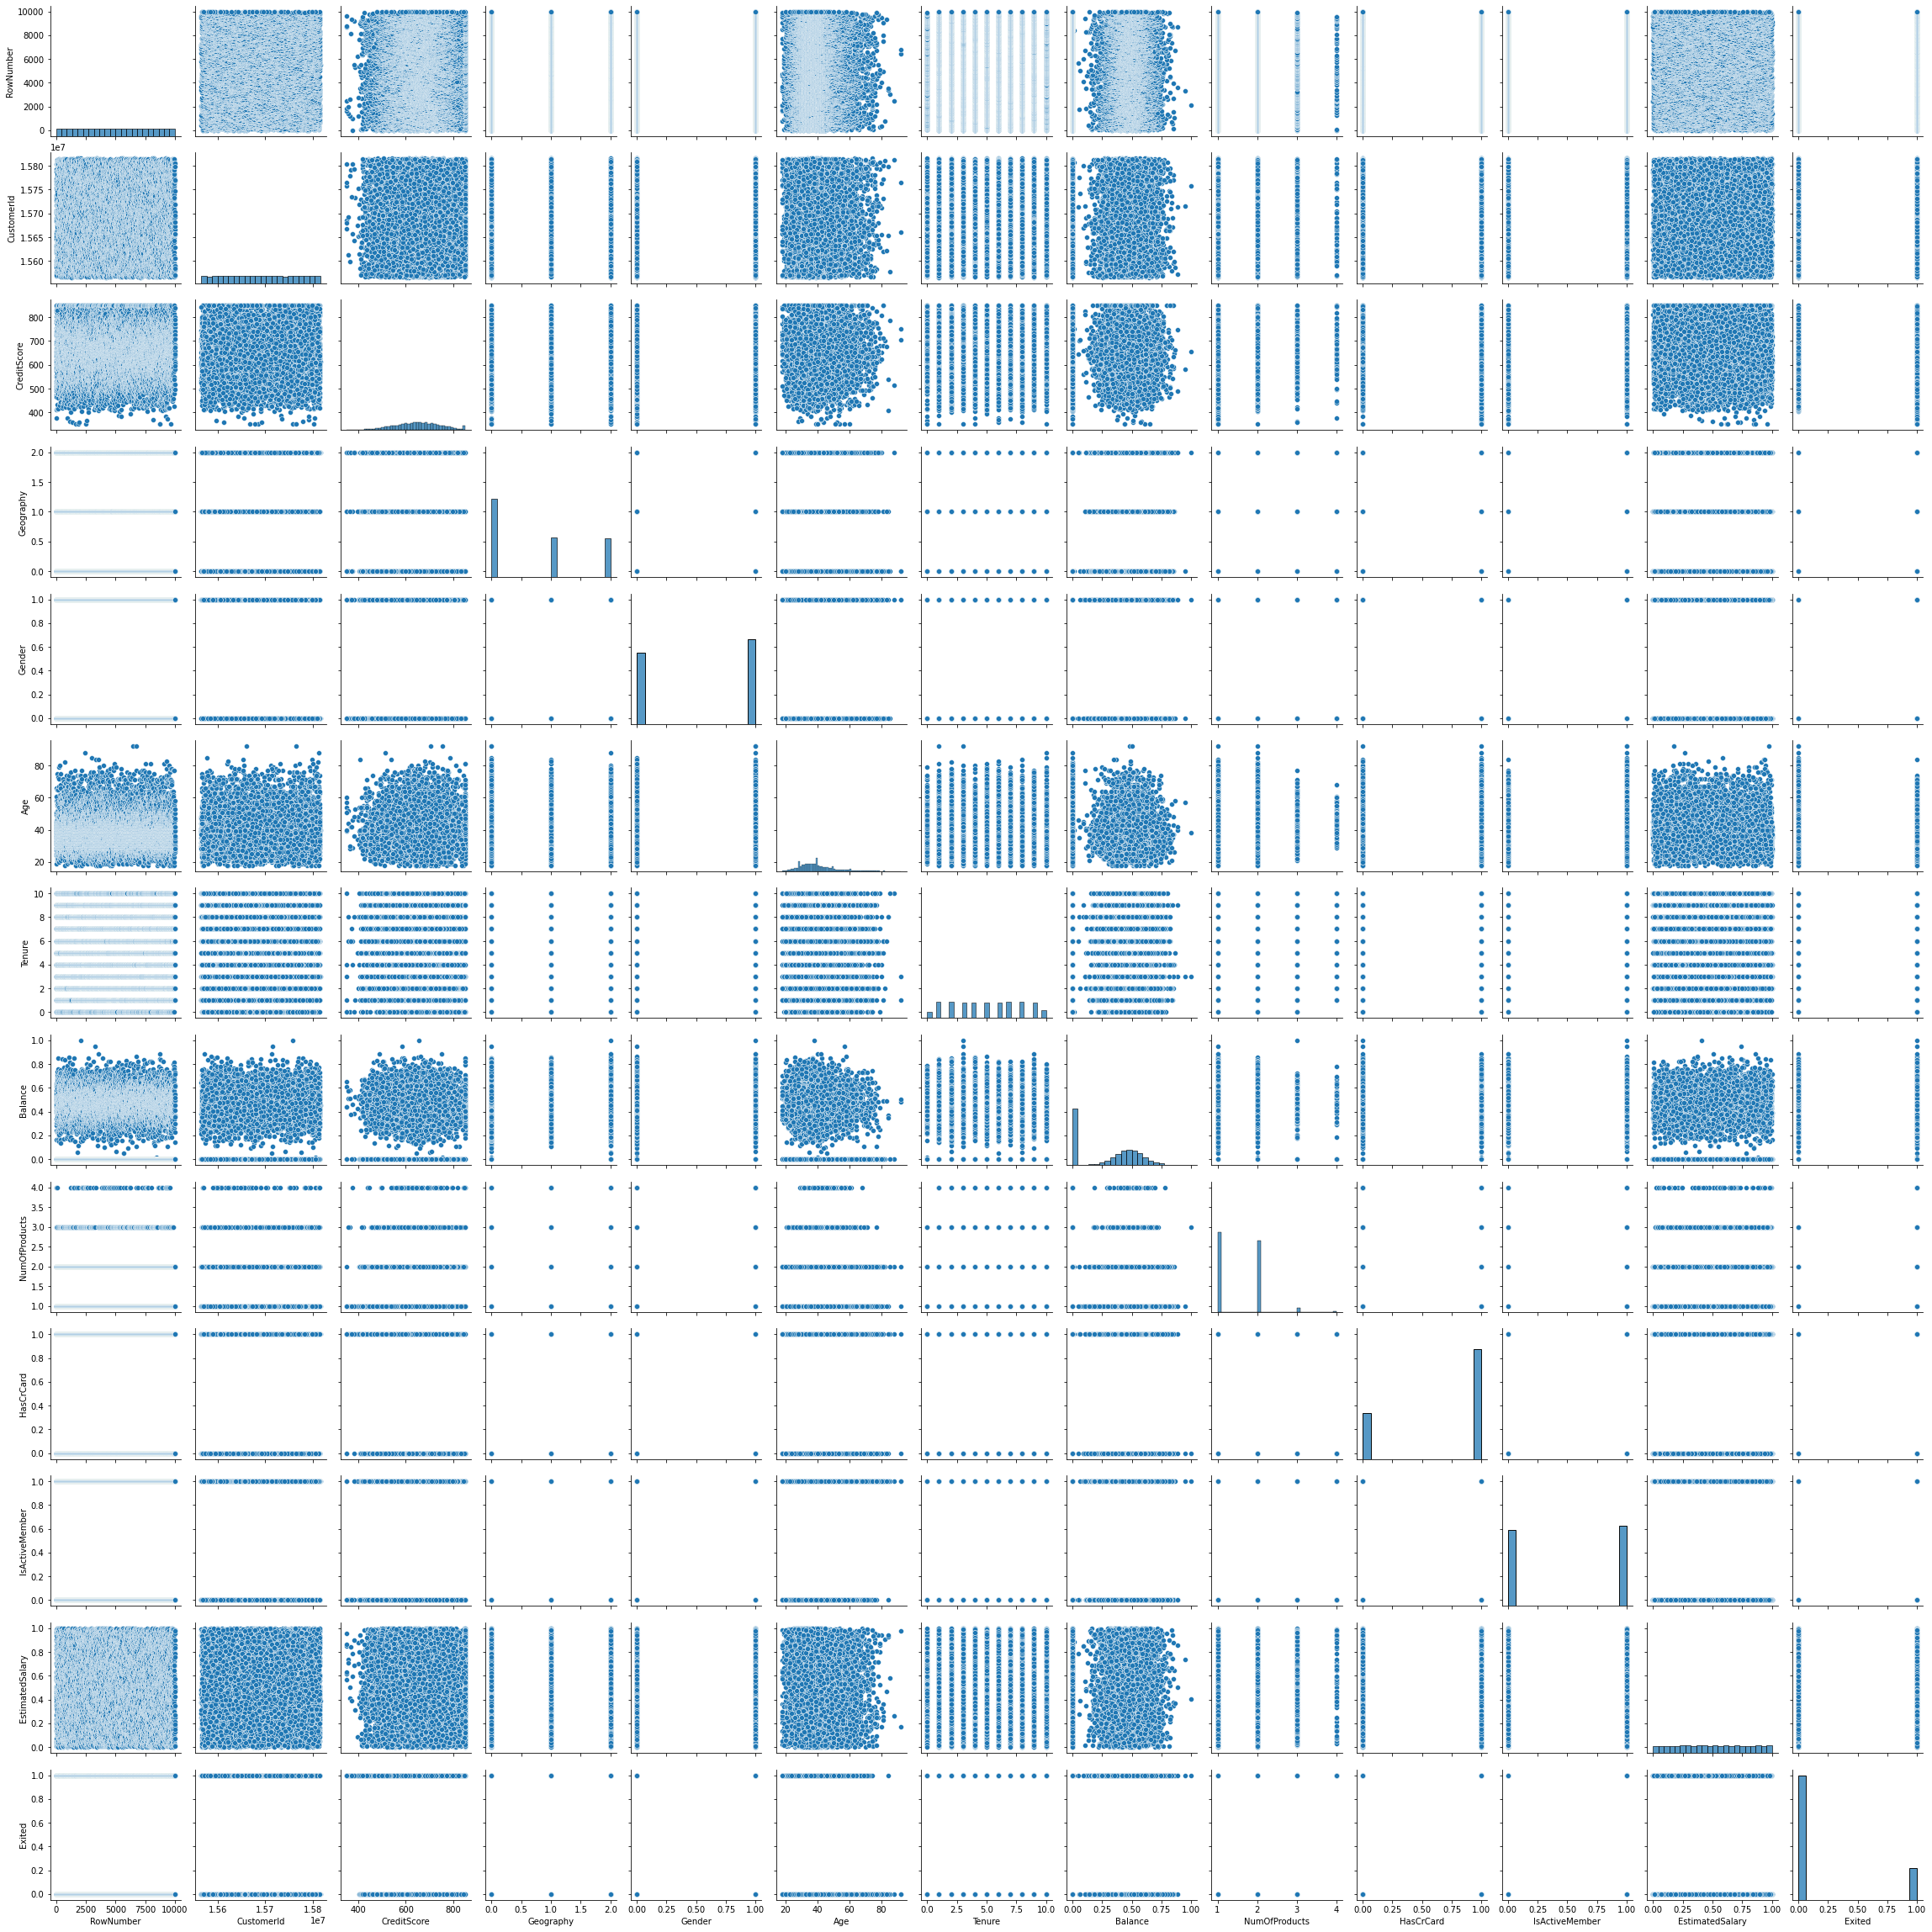

In [18]:
sns.pairplot(data=bank_data)

<AxesSubplot:>

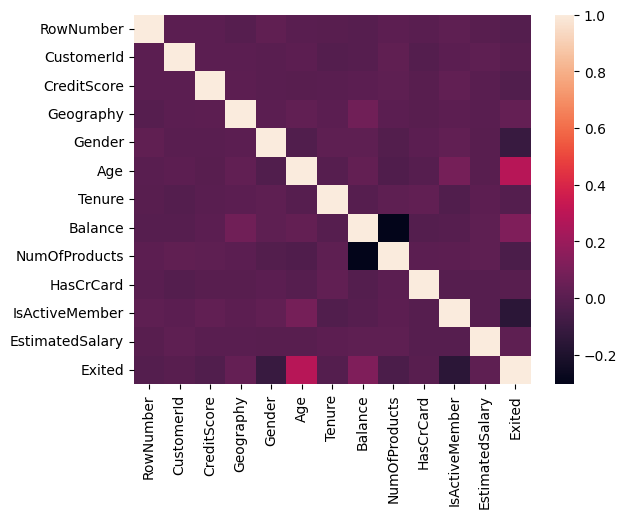

In [19]:
sns.heatmap(data=bank_data.corr())

## Model Selection

In [20]:
bank_data = bank_data.drop(['CustomerId', 'RowNumber','Surname'],axis=1)

In [21]:
bank_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.000000,1,1,1,0.506735,1
1,608,2,0,41,1,0.334031,1,0,1,0.562709,0
2,502,0,0,42,8,0.636357,3,1,0,0.569654,1
3,699,0,0,39,1,0.000000,2,0,0,0.469120,0
4,850,2,0,43,2,0.500246,1,1,1,0.395400,0


In [22]:
x = bank_data.drop(['Exited'],axis=1)

In [23]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.000000,1,1,1,0.506735
1,608,2,0,41,1,0.334031,1,0,1,0.562709
2,502,0,0,42,8,0.636357,3,1,0,0.569654
3,699,0,0,39,1,0.000000,2,0,0,0.469120
4,850,2,0,43,2,0.500246,1,1,1,0.395400
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.000000,2,1,0,0.481341
9996,516,0,1,35,10,0.228657,1,1,1,0.508490
9997,709,0,0,36,7,0.000000,1,0,1,0.210390
9998,772,1,1,42,3,0.299226,2,1,0,0.464429


In [24]:
y = bank_data['Exited']

In [25]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

## Split Train and Test

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [27]:
print(len(x_train), len(y_train))

8000 8000


In [28]:
print(len(x_test), len(y_test))

2000 2000


## Build a Model ANN

In [29]:
model = keras.Sequential([
    keras.layers.Dense(units=25,activation='relu'),
    keras.layers.Dense(units=20,activation='relu'),
    keras.layers.Dense(units=1,activation='sigmoid')
])

In [30]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [31]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 1.5394 - accuracy: 0.7566
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5442 - accuracy: 0.7930
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5076 - accuracy: 0.7918
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5034 - accuracy: 0.7880
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4994 - accuracy: 0.7905
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4988 - accuracy: 0.7884
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5014 - accuracy: 0.7865
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4843 - accuracy: 0.7919
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4890 - accuracy: 0.7885
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4831 - accura

250/250 [==============================] - 1s 3ms/step - loss: 0.4252 - accuracy: 0.8248
Epoch 82/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4280 - accuracy: 0.8191
Epoch 83/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4304 - accuracy: 0.8217
Epoch 84/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4269 - accuracy: 0.8201
Epoch 85/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4275 - accuracy: 0.8224
Epoch 86/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4249 - accuracy: 0.8223
Epoch 87/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4275 - accuracy: 0.8242
Epoch 88/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4227 - accuracy: 0.8266
Epoch 89/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4282 - accuracy: 0.8214
Epoch 90/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4258 - accuracy: 

In [32]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 1s 2ms/step - loss: 0.4231 - accuracy: 0.8235


[0.4231399893760681, 0.8234999775886536]

## Prediction and Classification Report

In [33]:
y_preds = model.predict(x_test)
y_preds

array([[0.14774132],
       [0.449063  ],
       [0.23729688],
       ...,
       [0.27374548],
       [0.08941895],
       [0.13263386]], dtype=float32)

In [34]:
y_pred = []
for element in y_preds:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
    

In [35]:
y_pred[:15]

[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1595
           1       0.64      0.30      0.40       405

    accuracy                           0.82      2000
   macro avg       0.74      0.63      0.65      2000
weighted avg       0.80      0.82      0.80      2000



In [37]:
acc_score = accuracy_score(y_test,y_pred) * 100
acc_score

82.35

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1527   68]
 [ 285  120]]
